In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load the dataset
file_path = "taxi_tripdata.csv"  # Change the path if necessary
data = pd.read_csv(file_path, low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [7]:
data['ehail_fee'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
83686   NaN
83687   NaN
83688   NaN
83689   NaN
83690   NaN
Name: ehail_fee, Length: 83691, dtype: float64>

In [6]:
data.describe()

VendorID    RatecodeID  PULocationID  DOLocationID  \
count  51173.000000  51173.000000  83691.000000  83691.000000   
mean       1.851113      1.159244    108.362572    133.270005   
std        0.355981      0.773260     70.370170     77.216791   
min        1.000000      1.000000      3.000000      1.000000   
25%        2.000000      1.000000     56.000000     69.000000   
50%        2.000000      1.000000     75.000000    132.000000   
75%        2.000000      1.000000    166.000000    205.000000   
max        2.000000      5.000000    265.000000    265.000000   

       passenger_count  trip_distance   fare_amount         extra  \
count     51173.000000   83691.000000  83691.000000  83691.000000   
mean          1.307858     194.354699     20.388305      1.156707   
std           0.984362    4405.549221     15.583552      1.367897   
min           0.000000       0.000000   -150.000000     -4.500000   
25%           1.000000       1.350000      9.000000      0.000000   
50%           1.000000       2.760000     16.000000      0.500000   
75%           1.000000       6.200000     26.830000      2.750000   
max          32.000000  260517.930000    480.000000      8.250000   

            mta_tax    tip_amount  tolls_amount  ehail_fee  \
count  83691.000000  83691.000000  83691.000000        0.0   
mean       0.293562      1.058618      0.624529        NaN   
std        0.247773      2.368771      1.990481        NaN   
min       -0.500000     -1.140000      0.000000        NaN   
25%        0.000000      0.000000      0.000000        NaN   
50%        0.500000      0.000000      0.000000        NaN   
75%        0.500000      1.660000      0.000000        NaN   
max        0.500000     87.710000     30.050000        NaN   

       improvement_surcharge  total_amount  payment_type     trip_type  \
count           83691.000000  83691.000000  51173.000000  51173.000000   
mean                0.297745     24.204836      1.421726      1.034393   
std                 0.031219     17.262183      0.511146      0.182239   
min                -0.300000   -150.300000      1.000000      1.000000   
25%                 0.300000     11.760000      1.000000      1.000000   
50%                 0.300000     19.800000      1.000000      1.000000   
75%                 0.300000     31.300000      2.000000      1.000000   
max                 0.300000    480.310000      5.000000      2.000000   

       congestion_surcharge  
count          51173.000000  
mean               0.642815  
std                1.164219  
min               -2.750000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                2.750000

In [8]:
data

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1           2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2           2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3           2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4           2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   
...         ...                  ...                   ...                ...   
83686       NaN  2021-07-02 07:59:00   2021-07-02 08:33:00                NaN   
83687       NaN  2021-07-02 07:02:00   2021-07-02 07:18:00                NaN   
83688       NaN  2021-07-02 07:53:00   2021-07-02 08:15:00                NaN   
83689       NaN  2021-07-02 07:58:00   2021-07-02 08:30:00                NaN   
83690       NaN  2021-07-02 07:00:00   2021-07-02 07:26:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0            74           168              1.0           1.20   
1             1.0           116           265              2.0          13.69   
2             1.0            97            33              1.0           0.95   
3             1.0            74            42              1.0           1.24   
4             1.0            42           244              1.0           1.10   
...           ...           ...           ...              ...            ...   
83686         NaN           218           169              NaN          18.04   
83687         NaN            74           137              NaN           5.56   
83688         NaN            69            75              NaN           5.13   
83689         NaN           117            82              NaN          12.58   
83690         NaN           218           196              NaN          11.32   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0             6.00   0.50      0.5        0.00          0.00        NaN   
1            42.00   0.50      0.5        0.00          0.00        NaN   
2             6.50   0.50      0.5        2.34          0.00        NaN   
3             6.50   0.50      0.5        0.00          0.00        NaN   
4             7.00   0.50      0.5        0.00          0.00        NaN   
...            ...    ...      ...         ...           ...        ...   
83686        50.24   2.75      0.0        0.00          6.55        NaN   
83687        19.16   0.00      0.0        3.66          0.00        NaN   
83688        22.45   0.00      0.0        0.00          0.00        NaN   
83689        48.62   2.75      0.0        0.00          2.45        NaN   
83690        45.84   2.75      0.0        0.00          0.00        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
0                        0.3          7.30           2.0        1.0   
1                        0.3         43.30           2.0        1.0   
2                        0.3         10.14           1.0        1.0   
3                        0.3          7.80           2.0        1.0   
4                        0.3          8.30           2.0        1.0   
...                      ...           ...           ...        ...   
83686                    0.3         59.84           NaN        NaN   
83687                    0.3         25.87           NaN        NaN   
83688                    0.3         22.75           NaN        NaN   
83689                    0.3         54.12           NaN        NaN   
83690                    0.3         48.89           NaN        NaN   

       congestion_surcharge  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
83686                   NaN  
83687                   NaN  
83688                   NaN  
83689  

In [12]:
pip uninstall -y numba pandas-profiling


Found existing installation: numba 0.59.1
Uninstalling numba-0.59.1:
  Successfully uninstalled numba-0.59.1
Found existing installation: pandas-profiling 3.2.0
Uninstalling pandas-profiling-3.2.0:
  Successfully uninstalled pandas-profiling-3.2.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [13]:
pip install numba==0.55.2


Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10; 0.55.0 Requires-Python >=3.7,<3.11; 0.55.0rc1 Requires-Python >=3.7,<3.11; 0.55.1 Requires-Python >=3.7,<3.11; 0.55.2 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numba==0.55.2 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0

In [14]:
!pip install pandas-profiling


  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl (262 kB)


In [19]:
!pip install -U ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(data, explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.20it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
data['VendorID'].value_counts()

VendorID
2.0    43554
1.0     7619
Name: count, dtype: int64

In [22]:
data.shape

(83691, 20)

In [23]:
data.isnull().sum()

VendorID                 32518
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       32518
RatecodeID               32518
PULocationID                 0
DOLocationID                 0
passenger_count          32518
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                83691
improvement_surcharge        0
total_amount                 0
payment_type             32518
trip_type                32518
congestion_surcharge     32518
dtype: int64

In [24]:
data['RatecodeID'].value_counts()

RatecodeID
1.0    48994
5.0     1954
2.0      158
4.0       41
3.0       26
Name: count, dtype: int64

In [30]:
#Drop ehail fee due to all values are null
data = data.drop('ehail_fee', axis=1)


In [32]:
data.shape

(83691, 19)

In [35]:
columns_to_drop = ['VendorID', 'payment_type', 'trip_type', 'congestion_surcharge']

# Drop only columns that exist
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [36]:
#For others we are filling that value with mode or 
data['lpep_pickup_datetime']=pd.to_datetime(data['lpep_pickup_datetime']) 
data['lpep_dropoff_datetime']=pd.to_datetime(data['lpep_dropoff_datetime']) 
data

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0      2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1      2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2      2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3      2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4      2021-07-01 00:51:32   2021-07-01 00:58:46                  N   
...                    ...                   ...                ...   
83686  2021-07-02 07:59:00   2021-07-02 08:33:00                NaN   
83687  2021-07-02 07:02:00   2021-07-02 07:18:00                NaN   
83688  2021-07-02 07:53:00   2021-07-02 08:15:00                NaN   
83689  2021-07-02 07:58:00   2021-07-02 08:30:00                NaN   
83690  2021-07-02 07:00:00   2021-07-02 07:26:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0            74           168              1.0           1.20   
1             1.0           116           265              2.0          13.69   
2             1.0            97            33              1.0           0.95   
3             1.0            74            42              1.0           1.24   
4             1.0            42           244              1.0           1.10   
...           ...           ...           ...              ...            ...   
83686         NaN           218           169              NaN          18.04   
83687         NaN            74           137              NaN           5.56   
83688         NaN            69            75              NaN           5.13   
83689         NaN           117            82              NaN          12.58   
83690         NaN           218           196              NaN          11.32   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             6.00   0.50      0.5        0.00          0.00   
1            42.00   0.50      0.5        0.00          0.00   
2             6.50   0.50      0.5        2.34          0.00   
3             6.50   0.50      0.5        0.00          0.00   
4             7.00   0.50      0.5        0.00          0.00   
...            ...    ...      ...         ...           ...   
83686        50.24   2.75      0.0        0.00          6.55   
83687        19.16   0.00      0.0        3.66          0.00   
83688        22.45   0.00      0.0        0.00          0.00   
83689        48.62   2.75      0.0        0.00          2.45   
83690        45.84   2.75      0.0        0.00          0.00   

       improvement_surcharge  total_amount  
0                        0.3          7.30  
1                        0.3         43.30  
2                        0.3         10.14  
3                        0.3          7.80  
4                        0.3          8.30  
...                      ...           ...  
83686                    0.3         59.84  
83687                    0.3         25.87  
83688                    0.3         22.75  
83689                    0.3         54.12  
83690                    0.3         48.89  

[83691 rows x 15 columns]

In [39]:
#Map function used for the mapping the name(i) to new
#and also using median for replacement of null values in passenger columns
data['store_and_fwd_flag'].value_counts()

data['store_and_fwd_flag'] = data['store_and_fwd_flag'].fillna('U')
data['passenger_count'] = data['passenger_count'].fillna(data['passenger_count'].median())


In [40]:
data

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0      2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1      2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2      2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3      2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4      2021-07-01 00:51:32   2021-07-01 00:58:46                  N   
...                    ...                   ...                ...   
83686  2021-07-02 07:59:00   2021-07-02 08:33:00                  U   
83687  2021-07-02 07:02:00   2021-07-02 07:18:00                  U   
83688  2021-07-02 07:53:00   2021-07-02 08:15:00                  U   
83689  2021-07-02 07:58:00   2021-07-02 08:30:00                  U   
83690  2021-07-02 07:00:00   2021-07-02 07:26:00                  U   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0            74           168              1.0           1.20   
1             1.0           116           265              2.0          13.69   
2             1.0            97            33              1.0           0.95   
3             1.0            74            42              1.0           1.24   
4             1.0            42           244              1.0           1.10   
...           ...           ...           ...              ...            ...   
83686         NaN           218           169              1.0          18.04   
83687         NaN            74           137              1.0           5.56   
83688         NaN            69            75              1.0           5.13   
83689         NaN           117            82              1.0          12.58   
83690         NaN           218           196              1.0          11.32   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             6.00   0.50      0.5        0.00          0.00   
1            42.00   0.50      0.5        0.00          0.00   
2             6.50   0.50      0.5        2.34          0.00   
3             6.50   0.50      0.5        0.00          0.00   
4             7.00   0.50      0.5        0.00          0.00   
...            ...    ...      ...         ...           ...   
83686        50.24   2.75      0.0        0.00          6.55   
83687        19.16   0.00      0.0        3.66          0.00   
83688        22.45   0.00      0.0        0.00          0.00   
83689        48.62   2.75      0.0        0.00          2.45   
83690        45.84   2.75      0.0        0.00          0.00   

       improvement_surcharge  total_amount  
0                        0.3          7.30  
1                        0.3         43.30  
2                        0.3         10.14  
3                        0.3          7.80  
4                        0.3          8.30  
...                      ...           ...  
83686                    0.3         59.84  
83687                    0.3         25.87  
83688                    0.3         22.75  
83689                    0.3         54.12  
83690                    0.3         48.89  

[83691 rows x 15 columns]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   83691 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  83691 non-null  datetime64[ns]
 2   store_and_fwd_flag     83691 non-null  object        
 3   RatecodeID             51173 non-null  float64       
 4   PULocationID           83691 non-null  int64         
 5   DOLocationID           83691 non-null  int64         
 6   passenger_count        83691 non-null  float64       
 7   trip_distance          83691 non-null  float64       
 8   fare_amount            83691 non-null  float64       
 9   extra                  83691 non-null  float64       
 10  mta_tax                83691 non-null  float64       
 11  tip_amount             83691 non-null  float64       
 12  tolls_amount           83691 non-null  float64       
 13  i

In [42]:
data.isnull().sum()

lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID               32518
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
dtype: int64

In [44]:
data['passenger_count'].value_counts()

passenger_count
1.0     76645
2.0      3922
5.0      1240
6.0      1018
3.0       626
4.0       181
0.0        56
7.0         2
32.0        1
Name: count, dtype: int64

In [46]:
#We replace the values like 32/7/0 that are the default or greater as compared to taxi seats 
data['passenger_count']=data['passenger_count'].replace({32:1,7:1,0:1})
data['passenger_count'].isna().sum()

0

In [48]:
#we are cleaning the value of total amount and fare amount where its value goes to negative number(in only consider the positive value )
len(data[data['fare_amount']<=0])
data=data[data['fare_amount']>0]
len(data[data['total_amount']<=0])
data=data[data['total_amount']>0]
len(data[data['trip_distance']<=0])
data=data[data['trip_distance']>0]


data['passenger_count'].value_counts()


passenger_count
1.0    73201
2.0     3779
5.0     1215
6.0     1017
3.0      597
4.0      177
Name: count, dtype: int64

In [49]:
data.shape

(79986, 15)

In [50]:
data['trip_distance'].value_counts()

trip_distance
1.40         505
1.60         406
1.00         382
1.10         382
1.20         381
            ... 
73860.22       1
114125.34      1
642.15         1
127092.40      1
33.63          1
Name: count, Length: 3142, dtype: int64

In [51]:
data['RatecodeID'] = data['RatecodeID'].fillna(1)
data['RatecodeID'].value_counts()

RatecodeID
1.0    78529
5.0     1262
2.0      137
4.0       41
3.0       17
Name: count, dtype: int64

In [52]:
data.groupby(['RatecodeID'])['trip_distance'].median()

RatecodeID
1.0     2.90
2.0    17.68
3.0     0.49
4.0    11.90
5.0     2.68
Name: trip_distance, dtype: float64

In [53]:
# Fix: Update a specific column instead of replacing entire rows
data.loc[(data['trip_distance'] <= 0) & (data['RatecodeID'] == 1.0), 'fare_amount'] = 2.8
data.loc[(data['trip_distance'] <= 0) & (data['RatecodeID'] == 2.0), 'fare_amount'] = 20
data.loc[(data['trip_distance'] <= 0) & (data['RatecodeID'] == 3.0), 'fare_amount'] = 24
data.loc[(data['trip_distance'] <= 0) & (data['RatecodeID'] == 4.0), 'fare_amount'] = 12
data.loc[(data['trip_distance'] <= 0) & (data['RatecodeID'] == 5.0), 'fare_amount'] = 3.1


In [56]:
print(data.dtypes)

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object


In [60]:
%matplotlib inline 

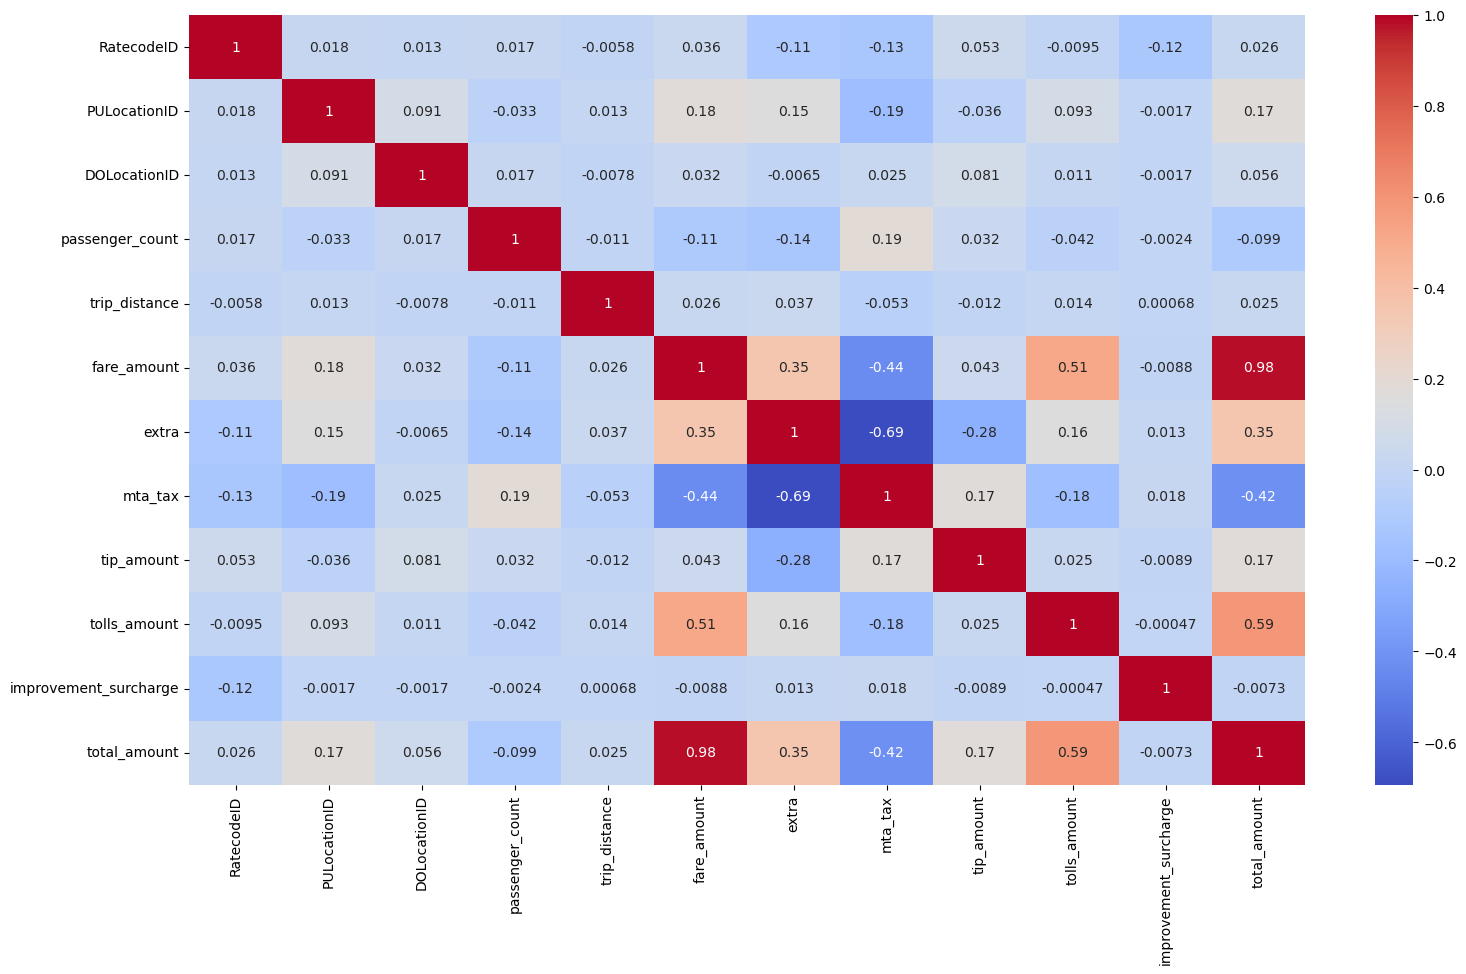

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

 

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(18, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.show()




In [63]:
#Which is the busiest day
data['lpep_pickup_datetime']=pd.to_datetime(data['lpep_pickup_datetime']) 
data['day_of_week'] = data['lpep_pickup_datetime'].dt.day_name()

C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_1000\4150318063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y= 'day_of_week', data= data, palette='viridis')


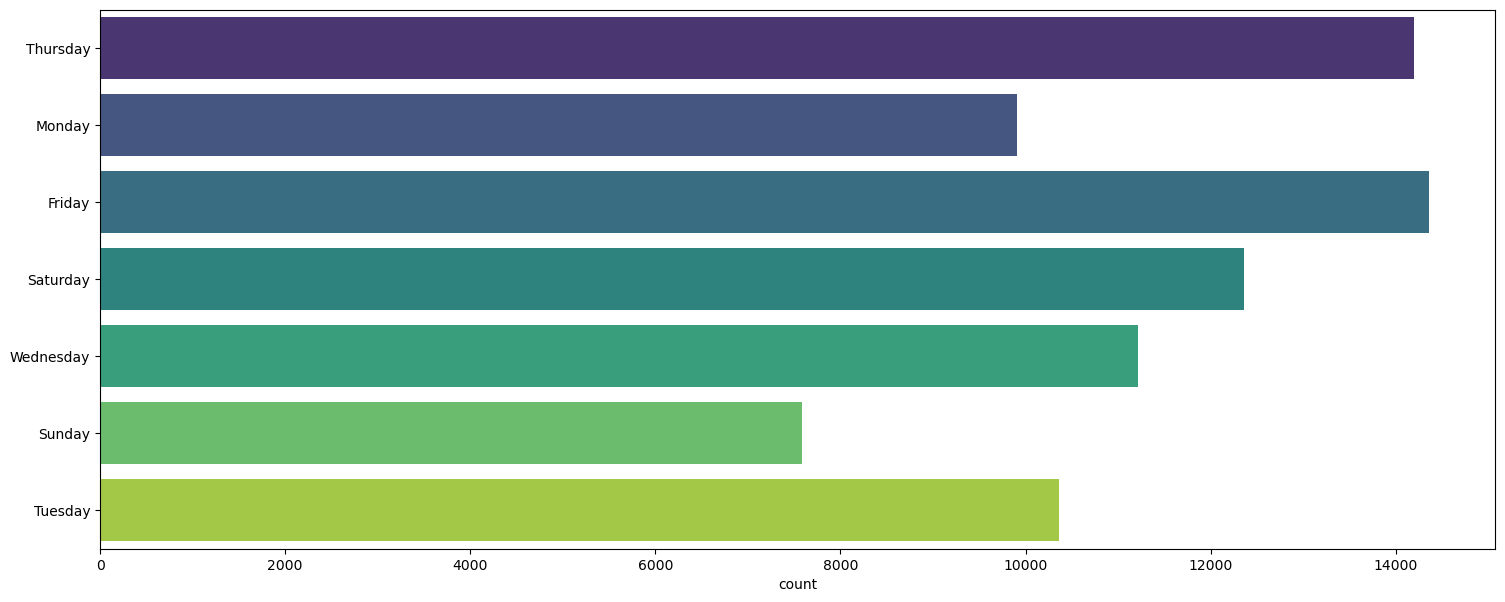

In [65]:
plt.figure(figsize= (18, 7))
sns.countplot(y= 'day_of_week', data= data, palette='viridis')
plt.ylabel('');

C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_1000\1398923563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data['lpep_pickup_datetime'].dt.hour, data= data, palette='plasma')


Text(0.5, 0, 'Hour of Day')

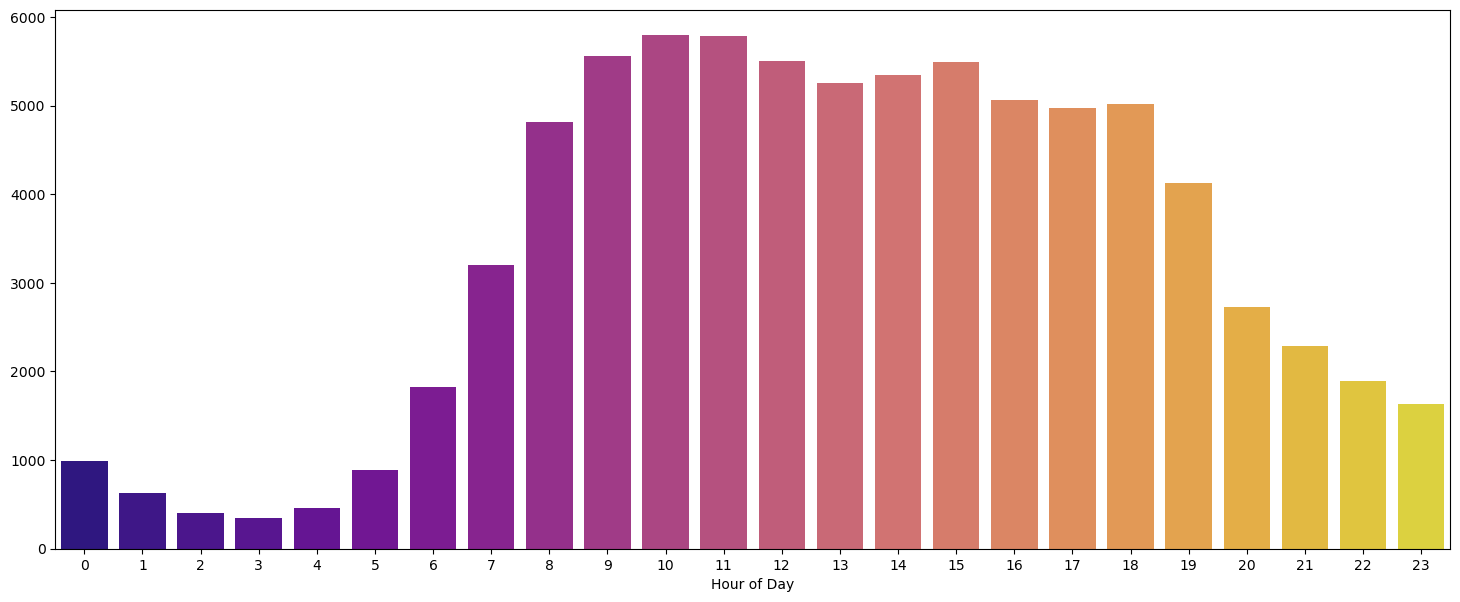

In [67]:
#Which is busiest hour
plt.figure(figsize= (18, 7))
sns.countplot(x= data['lpep_pickup_datetime'].dt.hour, data= data, palette='plasma')
plt.ylabel('')
plt.xlabel('Hour of Day')

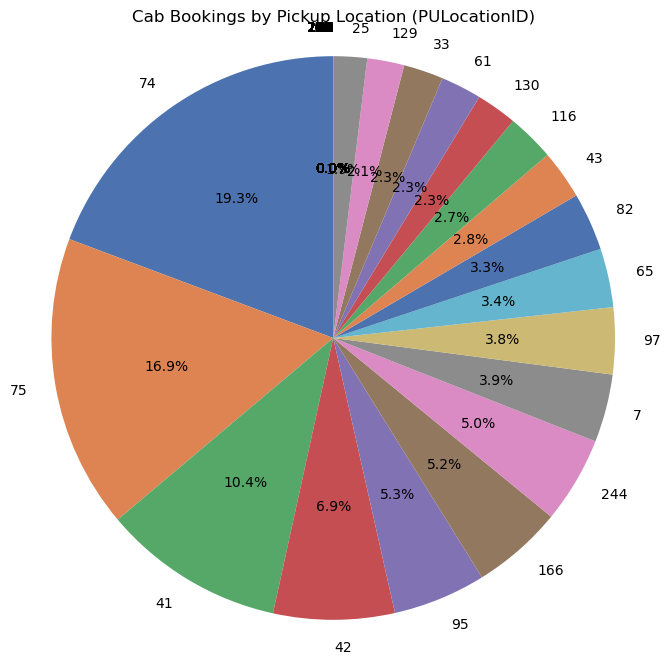

In [71]:
# Count of bookings per pickup location
pickup_counts = data['PULocationID'].value_counts()

# Convert to percentages
pickup_percentages = (pickup_counts / pickup_counts.sum()) * 100

# Set small values (<1%) to 0 for better visualization
pickup_percentages[pickup_percentages < 1] = 0

# Generate colors using Seaborn
colors = sns.color_palette("deep", len(pickup_percentages))

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(pickup_percentages, labels=pickup_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)

plt.axis('equal')  # Ensures a perfect circle
plt.title('Cab Bookings by Pickup Location (PULocationID)')
plt.show()

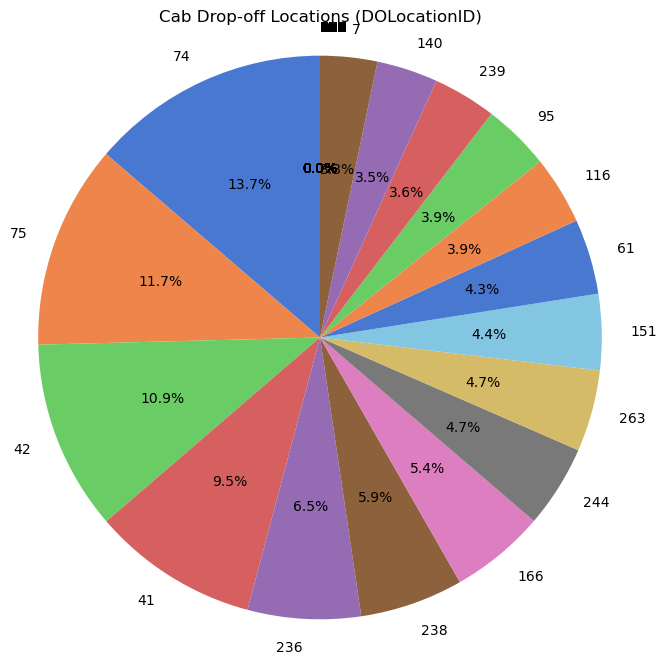

In [73]:
# Count of bookings per drop-off location
dropl_counts = data['DOLocationID'].value_counts()

# Convert to percentages
dropl_percentages = (dropl_counts / dropl_counts.sum()) * 100

# Set small values (<1%) to 0 for better visualization
dropl_percentages[dropl_percentages < 1] = 0

# Generate colors using Seaborn
colors = sns.color_palette("muted", len(dropl_percentages))  # Change "muted" to any palette

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(dropl_percentages, labels=dropl_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)

plt.axis('equal')  # Ensures a perfect circle
plt.title('Cab Drop-off Locations (DOLocationID)')
plt.show()

In [75]:
data = data.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'day_of_week'], axis=1)


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['store_and_fwd_flag'] = le.fit_transform(data['store_and_fwd_flag'])
data.head()

store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0                   0         1.0            74           168   
1                   0         1.0           116           265   
2                   0         1.0            97            33   
3                   0         1.0            74            42   
4                   0         1.0            42           244   

   passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0              1.0           1.20          6.0    0.5      0.5        0.00   
1              2.0          13.69         42.0    0.5      0.5        0.00   
2              1.0           0.95          6.5    0.5      0.5        2.34   
3              1.0           1.24          6.5    0.5      0.5        0.00   
4              1.0           1.10          7.0    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  
0           0.0                    0.3          7.30  
1           0.0                    0.3         43.30  
2           0.0                    0.3         10.14  
3           0.0                    0.3          7.80  
4           0.0                    0.3          8.30

In [77]:
clu_col = data[['fare_amount', 'trip_distance', 'passenger_count', 'total_amount']]

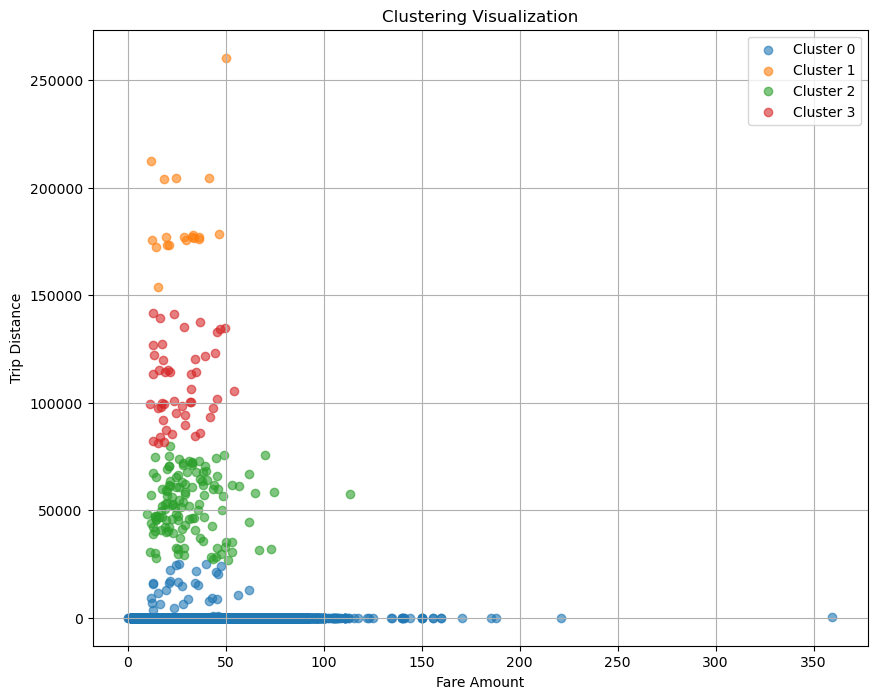

In [79]:
from sklearn.cluster import KMeans


# Perform K-Means clustering
n_clusters = 4  # You can choose the number of clusters you want
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(clu_col)

# Get the cluster assignments for each data point
cluster_labels = kmeans_model.labels_

# Add the cluster information to the DataFrame
data['cluster'] = cluster_labels

# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for cluster_id in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_data['fare_amount'], cluster_data['trip_distance'], label=f'Cluster {cluster_id}', alpha=0.6)

plt.xlabel('Fare Amount')
plt.ylabel('Trip Distance')
plt.title('Clustering Visualization')
plt.legend()
plt.grid(True)
plt.show()